In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sales_data_with_discounts.csv')


In [21]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [22]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [23]:
mean_values = data[numerical_cols].mean()
mean_values


,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


In [24]:
median_values = data[numerical_cols].median()
median_values

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


In [25]:
mode_values = data[numerical_cols].mode().iloc[0]
mode_values

,0
Volume,3.000000
Avg Price,400.000000
Total Sales Value,24300.000000
Discount Rate (%),5.007822
Discount Amount,69.177942
Net Sales Value,326.974801


In [26]:
std_values = data[numerical_cols].std()
std_values

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


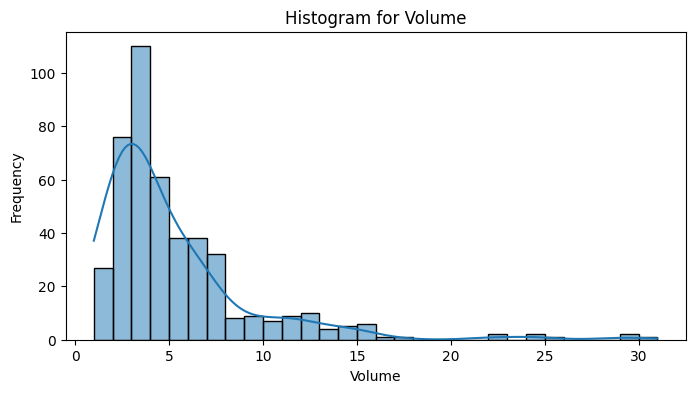

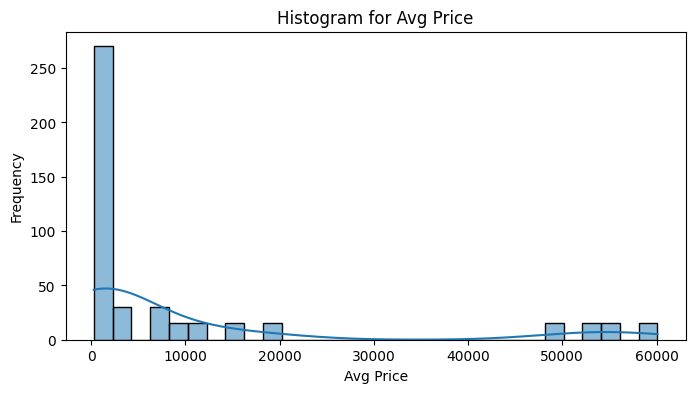

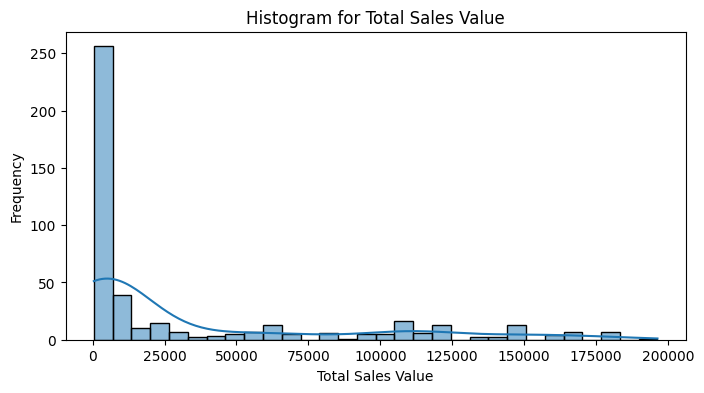

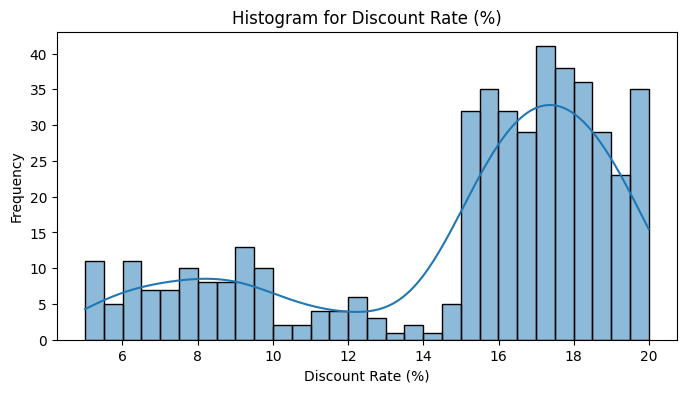

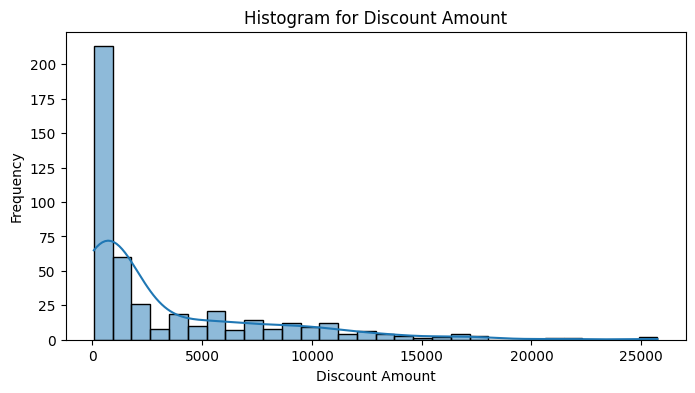

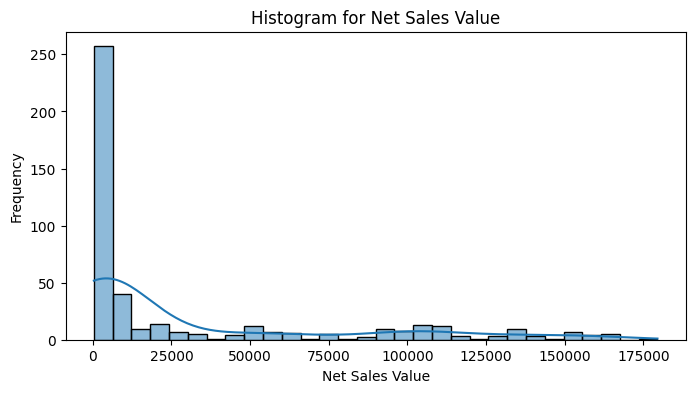

In [28]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


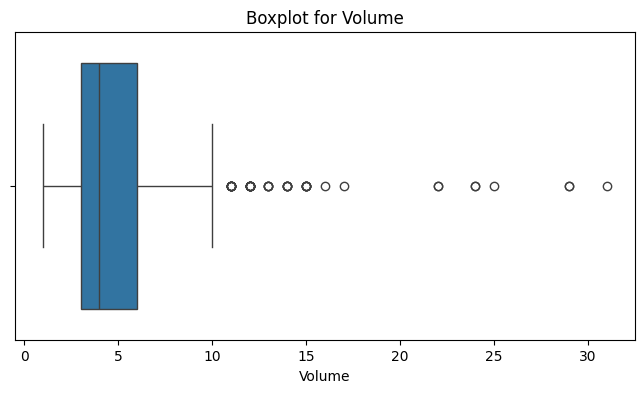

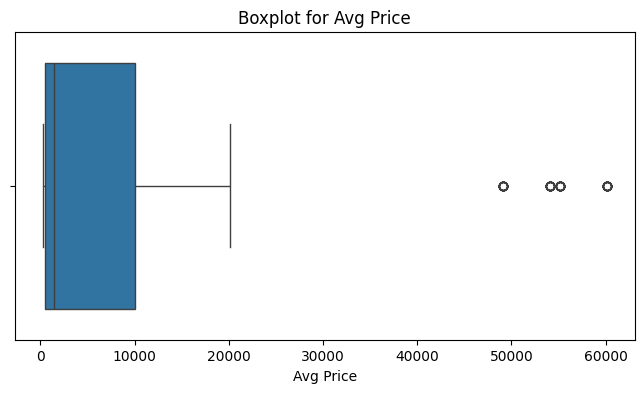

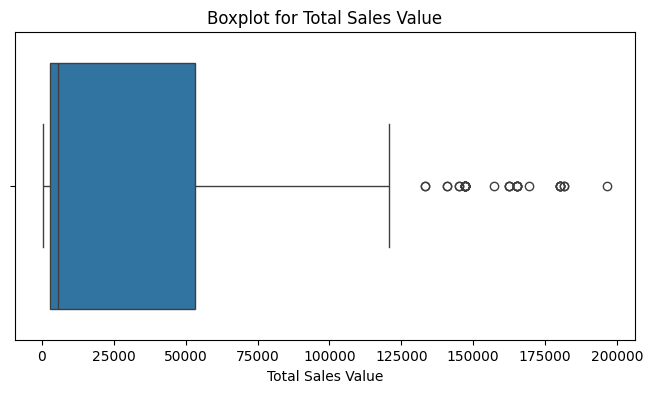

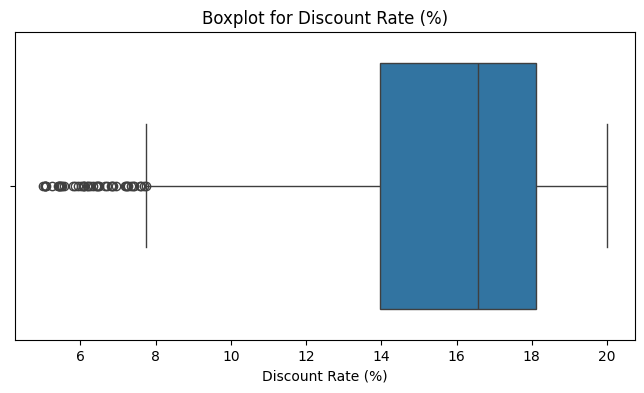

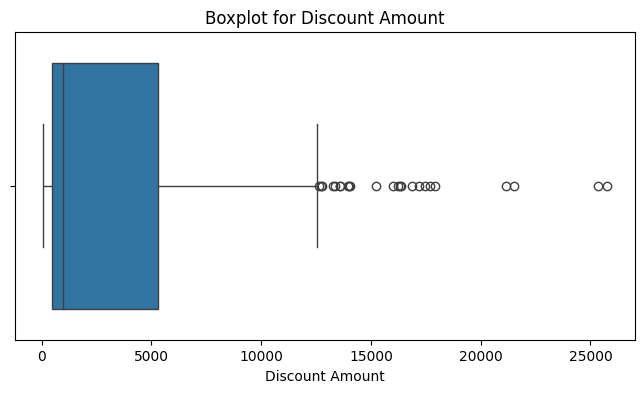

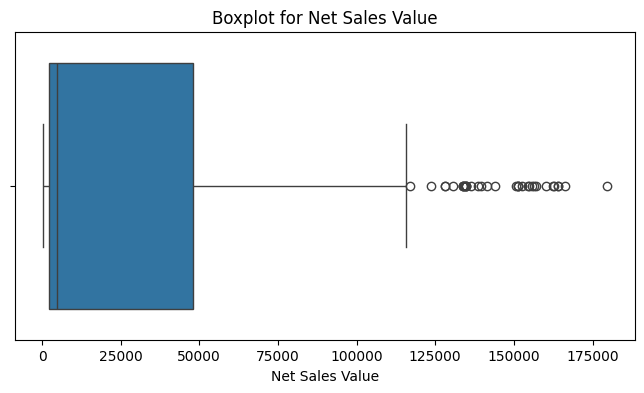

In [29]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()


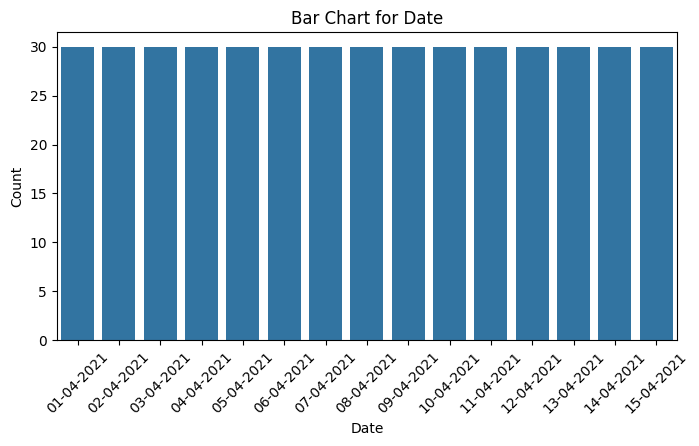

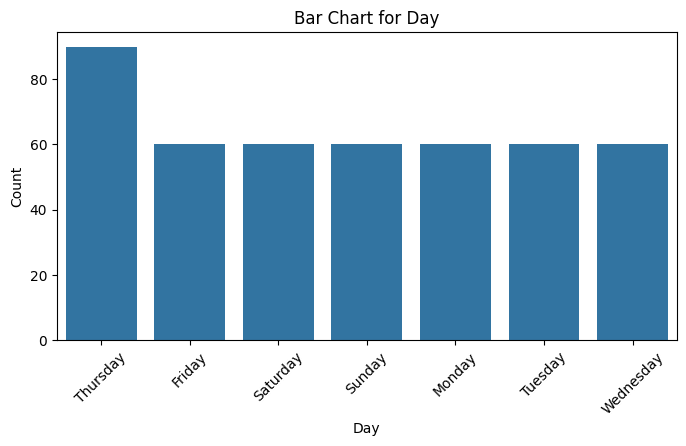

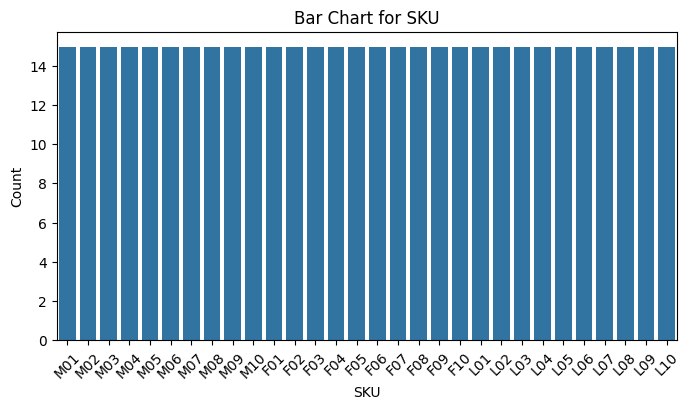

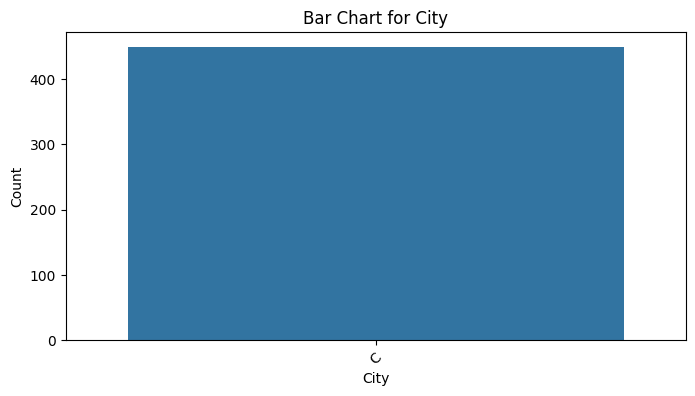

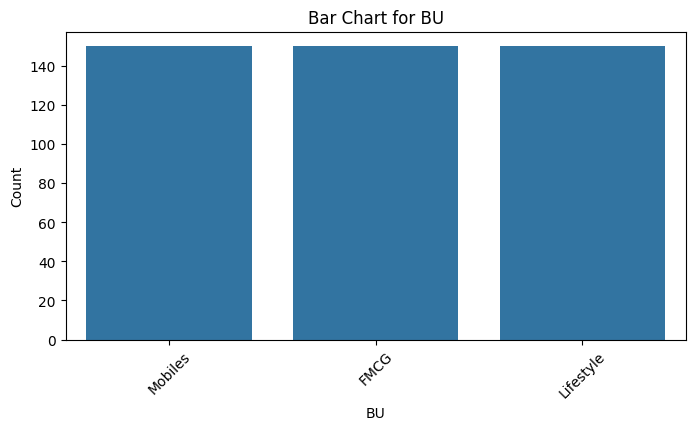

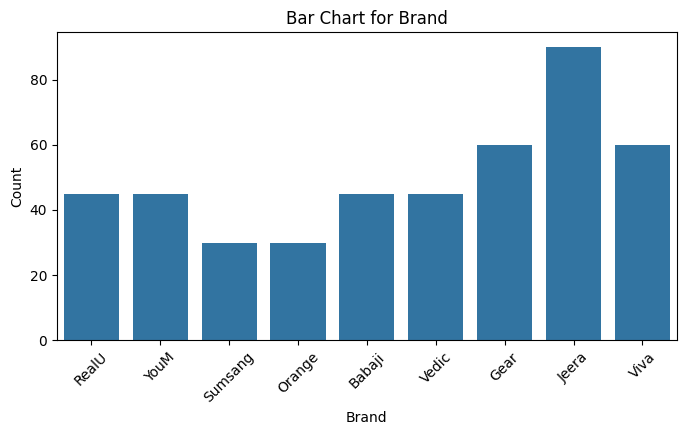

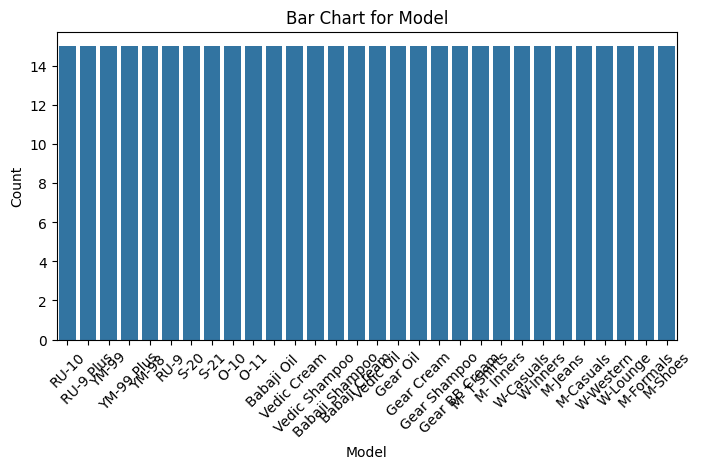

In [30]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col])
    plt.title(f'Bar Chart for {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)
print(standardized_data.describe())


             Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean   6.118562e-17  3.157968e-17       1.578984e-17      -3.552714e-17   
std    1.001113e+00  1.001113e+00       1.001113e+00       1.001113e+00   
min   -9.620925e-01 -5.627654e-01      -6.619170e-01      -2.406935e+00   
25%   -4.889322e-01 -5.530754e-01      -6.163534e-01      -2.823066e-01   
50%   -2.523521e-01 -4.985344e-01      -5.569226e-01       3.374180e-01   
75%    2.208081e-01 -1.957016e-02       3.840648e-01       7.019781e-01   
max    6.135311e+00  2.749009e+00       3.220894e+00       1.147360e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -5.526444e-17     1.973730e-17  
std       1.001113e+00     1.001113e+00  
min      -7.275032e-01    -6.508581e-01  
25%      -6.406462e-01    -6.103625e-01  
50%      -5.233349e-01    -5.569025e-01  
75%       4.373018e-01     3.7

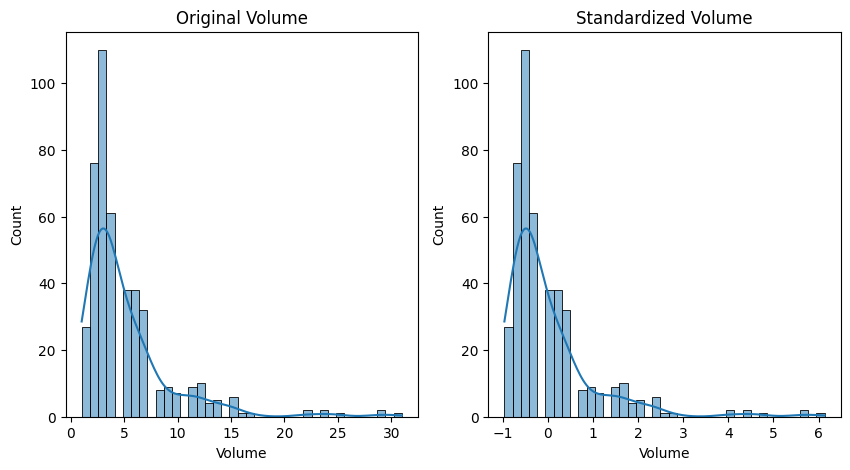

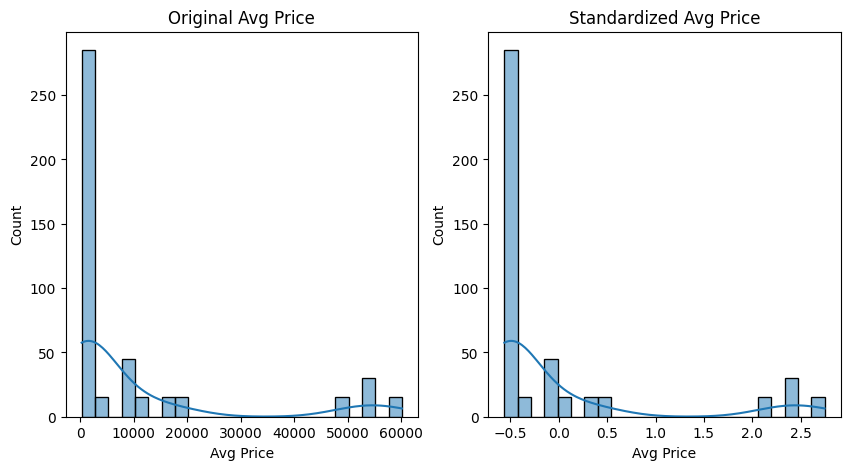

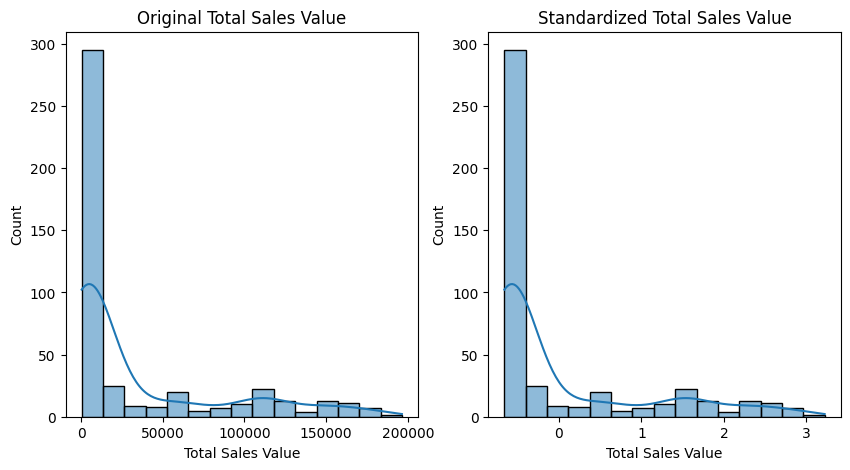

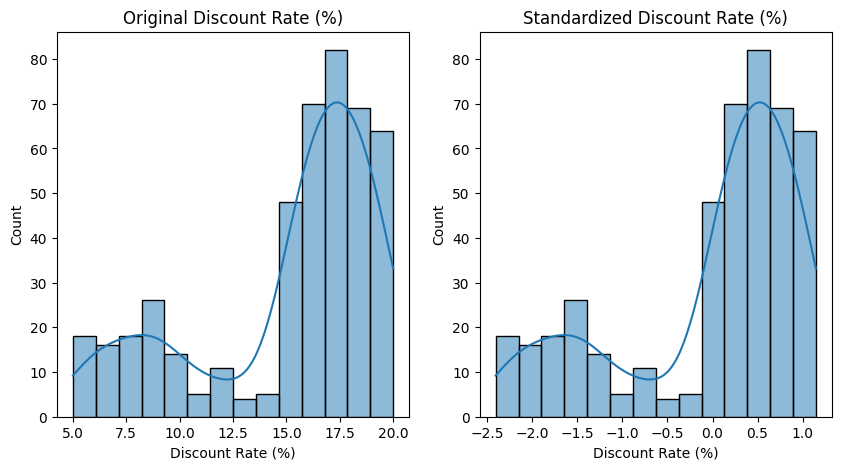

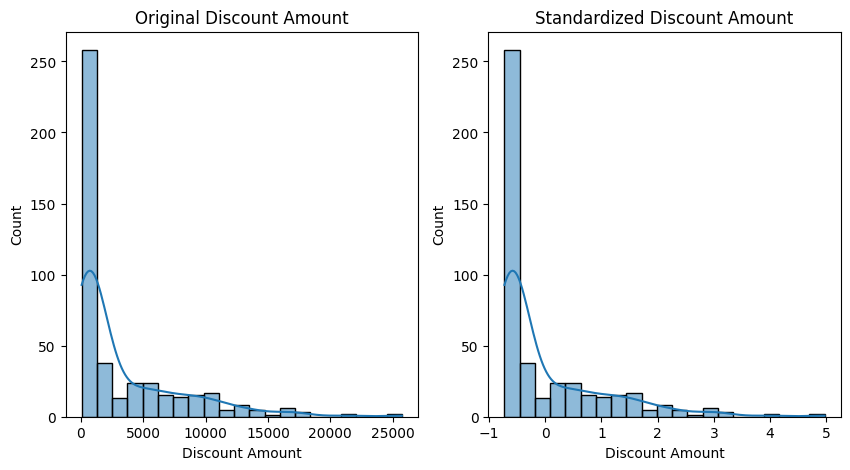

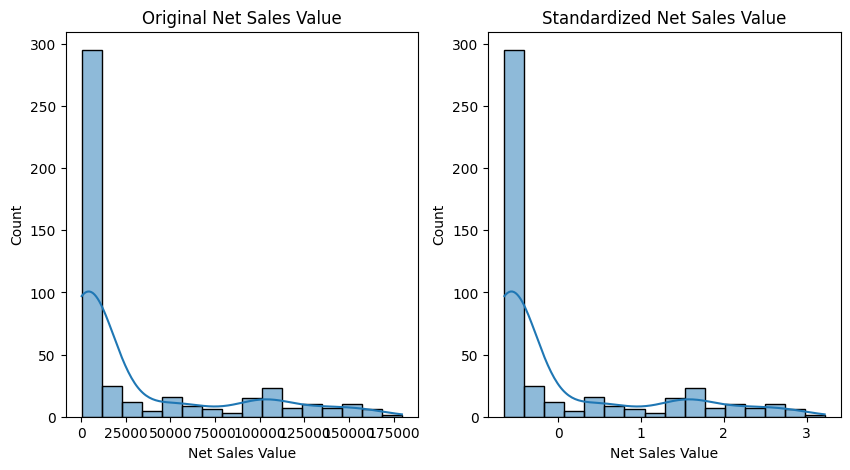

In [32]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Original {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(standardized_data[col], kde=True)
    plt.title(f'Standardized {col}')
    plt.show()


In [33]:
encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(encoded_data.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...